In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\emmalee.dolfi\springboard_datascience-master\Capstone\data')

In [2]:
parksInfo = pd.read_excel('NYC_parksInfo_all.xlsx', index_col = 'index')
#parksInfo.head()

parksInfo_dummied = pd.get_dummies(parksInfo.drop(['GISPROPNUM','TPL_P_NAME','SIGNNAME', 'OBJECTID','FREQUENCY', 'SUM_SVCAREA'], axis=1))
parksInfo_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 50 columns):
ACRES                                     98 non-null float64
handball                                  98 non-null int64
tennis                                    98 non-null int64
basketball                                98 non-null int64
adult_soft                                98 non-null int64
track_and                                 98 non-null int64
play_area_count                           98 non-null int64
preserve_count                            98 non-null int64
spray_count                               98 non-null int64
SUM_TOTPOPSVCA                            98 non-null int64
SUM_KIDSVCA                               98 non-null int64
SUM_YOUNGPROSVCA                          98 non-null int64
SUM_SENIORSVCA                            98 non-null int64
SUM_HHILOWSVCA                            98 non-null int64
SUM_HHIMEDSVCA                            98 non-null i

In [3]:
# look at distribution of tweets counts to determine class thresholds
parksInfo_dummied.tweet_count.describe()

count       98.00000
mean       568.55102
std       2435.58974
min          2.00000
25%         22.00000
50%         53.50000
75%        242.75000
max      22373.00000
Name: tweet_count, dtype: float64

In [4]:
# in the future, use pandas.cut
def label_tweets (row):
   if row['tweet_count'] <= 30:
    return 0
   if row['tweet_count'] > 30 and row['tweet_count'] <= 200:
    return 1
   else:
    return 2

parksInfo_dummied['tweet_class'] = parksInfo_dummied.apply(lambda row: label_tweets (row),axis=1)
parksInfo_dummied.head()

,ACRES,handball,tennis,basketball,adult_soft,track_and,play_area_count,preserve_count,spray_count,SUM_TOTPOPSVCA,...,TYPECATEGO_Playground,TYPECATEGO_Recreation Field/Courts,TYPECATEGO_Restrictive Declaration,TYPECATEGO_Schoolyard-Playground,TYPECATEGO_Schoolyards to Playgrounds,TYPECATEGO_Tracking,TYPECATEGO_Triangle/Plaza,TYPECATEGO_Undeveloped,TYPECATEGO_Waterfront Facility,tweet_class
index,,,,,,,,,,,,,,,,,,,,,
0,1.874,0,0,3,1,0,4,0,1,26177,...,0,0,0,0,0,0,0,0,0,2
1,6.379,4,0,1,0,0,5,0,1,29767,...,0,0,0,0,0,0,0,0,0,1
2,35.713,12,8,4,4,0,7,0,2,42017,...,0,0,0,0,0,0,0,0,0,2
3,0.181,0,0,0,0,0,0,0,0,28730,...,0,0,0,0,0,0,0,0,0,1
4,0.293,0,0,0,0,0,1,0,1,32449,...,1,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import normalize

y = np.array(parksInfo.tweet_count)
X = parksInfo_dummied
#X_norm = normalize(X)

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_y.shape)

('Training Features Shape:', (78, 51))
('Training Labels Shape:', (78,))
('Testing Features Shape:', (20, 51))
('Testing Labels Shape:', (20,))


In [7]:
# Import the RF regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
# predict values on test data
predict_test = rf.predict(test_X)

In [9]:
# assess accuracy (r-squared)
print "Train R-squared :: ", rf.score(train_X, train_y)
print "Test R-squared  :: ", rf.score(test_X, test_y)

Train R-squared ::  0.9177973856679368
Test R-squared  ::  0.2757141594739043


In [10]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid using list of set values
param_grid = {'n_estimators': [100, 200, 300, 1000, 5000]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(train_X, train_y)
grid_search.best_params_

{'n_estimators': 100}

In [29]:
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(train_X, train_y)
predict_test = rf.predict(test_X)

print "Train R-squared :: ", rf.score(train_X, train_y)
print "Test R-squared  :: ", rf.score(test_X, test_y)

Train R-squared ::  0.8653115296513108
Test R-squared  ::  0.25302542372881365


**We can see from the above results above that we are not getting very dependable results using the RF regressor. Let's move onto the RF classifier...**

In [30]:
y = np.array(parksInfo_dummied.tweet_class)
X = parksInfo_dummied.drop(['tweet_class','tweet_count'], axis=1)
#X_norm = normalize(X)

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
# Train the model on training data
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
predict_test = rf.predict(test_X)
print "Train Accuracy :: ", accuracy_score(train_y, rf.predict(train_X))
print "Test Accuracy  :: ", accuracy_score(test_y, predict_test)

Train Accuracy ::  0.9743589743589743
Test Accuracy  ::  0.6


[(u'SUM_HHIHIGHSVCA', 0.11), (u'ACRES', 0.1), (u'SUM_YOUNGPROSVCA', 0.05), (u'SUM_ASIAN_SVC', 0.05), (u'TYPECATEGO_Schoolyard-Playground', 0.05), (u'SUM_TOTPOPSVCA', 0.04), (u'SUM_KIDSVCA', 0.04), (u'SUM_HHIMEDSVCA', 0.04), (u'SUM_WHITE_SVC', 0.04), (u'SUM_AMERINDSVC', 0.04), (u'SUM_RACE2UPSVC', 0.04), (u'play_area_count', 0.03), (u'SUM_SENIORSVCA', 0.03), (u'SUM_HHILOWSVCA', 0.03), (u'SUM_OTHRACESVC', 0.03), (u'total_amenities', 0.03), (u'tennis', 0.02), (u'basketball', 0.02), (u'SUM_TOTHHSVCA', 0.02), (u'SUM_BLACK_SVC', 0.02), (u'SUM_PACIFICSVC', 0.02), (u'TYPECATEGO_Community Park', 0.02), (u'TYPECATEGO_Jointly Operated Playground', 0.02), (u'TYPECATEGO_Neighborhood Park', 0.02), (u'handball', 0.01), (u'preserve_count', 0.01), (u'spray_count', 0.01), (u'SUM_HISP_SVC', 0.01), (u'BOROUGH_Q', 0.01), (u'BOROUGH_X', 0.01), (u'TYPECATEGO_Buildings/Institutions', 0.01), (u'TYPECATEGO_Garden', 0.01), (u'TYPECATEGO_Historic House Park', 0.01), (u'TYPECATEGO_Triangle/Plaza', 0.01), (u'adult_s

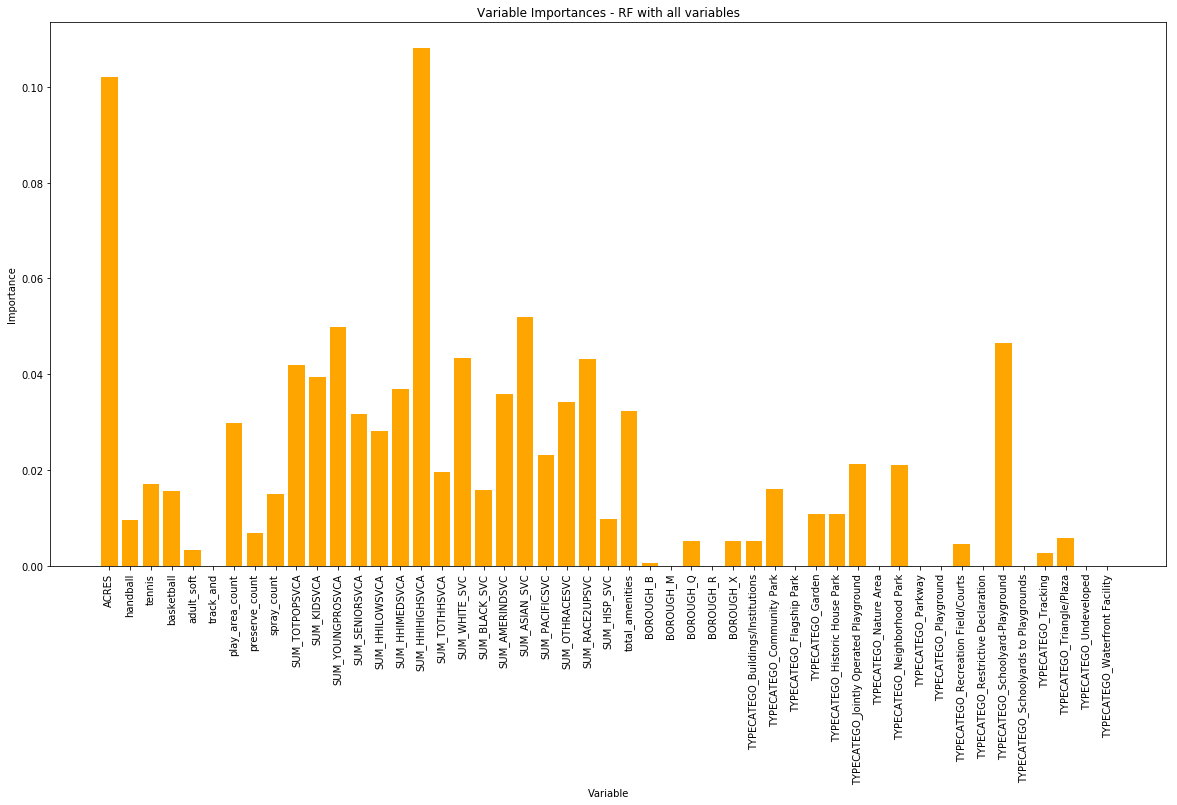

In [38]:
importances = list(rf.feature_importances_)

feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
print(sorted(feature_importances, key = lambda x: x[1], reverse=True))

plt.figure(figsize=(20,10))

x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'orange')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation=90)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - RF with all variables');

**This RF classification model resulted in a training accuracy of 97% and a test accuracy of 60%, which means the model is overfit. The RF classifier, however, seems to be throwing more accurate results overall. Interestingly, park size (acres) and the # of high income households living within a 10-minute walk of the park are the two more important features driving our model results, though neither of them are exceptionally great.**

Moving onto hyperparameterization...

In [39]:
# Create the parameter grid based on the results of range
param_grid = {'n_estimators': range(1,50)}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(train_X, train_y)
grid_search.best_params_

{'n_estimators': 17}

In [43]:
rf = RandomForestClassifier(n_estimators=17)
# Train the model on training data
rf.fit(train_X, train_y)

predict_test = rf.predict(test_X)

print "Train Accuracy :: ", accuracy_score(train_y, rf.predict(train_X))
print "Test Accuracy  :: ", accuracy_score(test_y, predict_test)

Train Accuracy ::  0.9871794871794872
Test Accuracy  ::  0.65


[(u'ACRES', 0.09), (u'SUM_WHITE_SVC', 0.07), (u'SUM_YOUNGPROSVCA', 0.06), (u'SUM_ASIAN_SVC', 0.05), (u'total_amenities', 0.05), (u'SUM_SENIORSVCA', 0.04), (u'SUM_HHILOWSVCA', 0.04), (u'SUM_HHIMEDSVCA', 0.04), (u'SUM_HHIHIGHSVCA', 0.04), (u'SUM_TOTHHSVCA', 0.04), (u'SUM_OTHRACESVC', 0.04), (u'SUM_KIDSVCA', 0.03), (u'SUM_BLACK_SVC', 0.03), (u'SUM_RACE2UPSVC', 0.03), (u'SUM_HISP_SVC', 0.03), (u'TYPECATEGO_Neighborhood Park', 0.03), (u'TYPECATEGO_Triangle/Plaza', 0.03), (u'handball', 0.02), (u'basketball', 0.02), (u'play_area_count', 0.02), (u'SUM_TOTPOPSVCA', 0.02), (u'SUM_AMERINDSVC', 0.02), (u'SUM_PACIFICSVC', 0.02), (u'tennis', 0.01), (u'adult_soft', 0.01), (u'BOROUGH_B', 0.01), (u'BOROUGH_Q', 0.01), (u'TYPECATEGO_Community Park', 0.01), (u'TYPECATEGO_Historic House Park', 0.01), (u'TYPECATEGO_Jointly Operated Playground', 0.01), (u'TYPECATEGO_Playground', 0.01), (u'TYPECATEGO_Schoolyard-Playground', 0.01), (u'track_and', 0.0), (u'preserve_count', 0.0), (u'spray_count', 0.0), (u'BOROUG

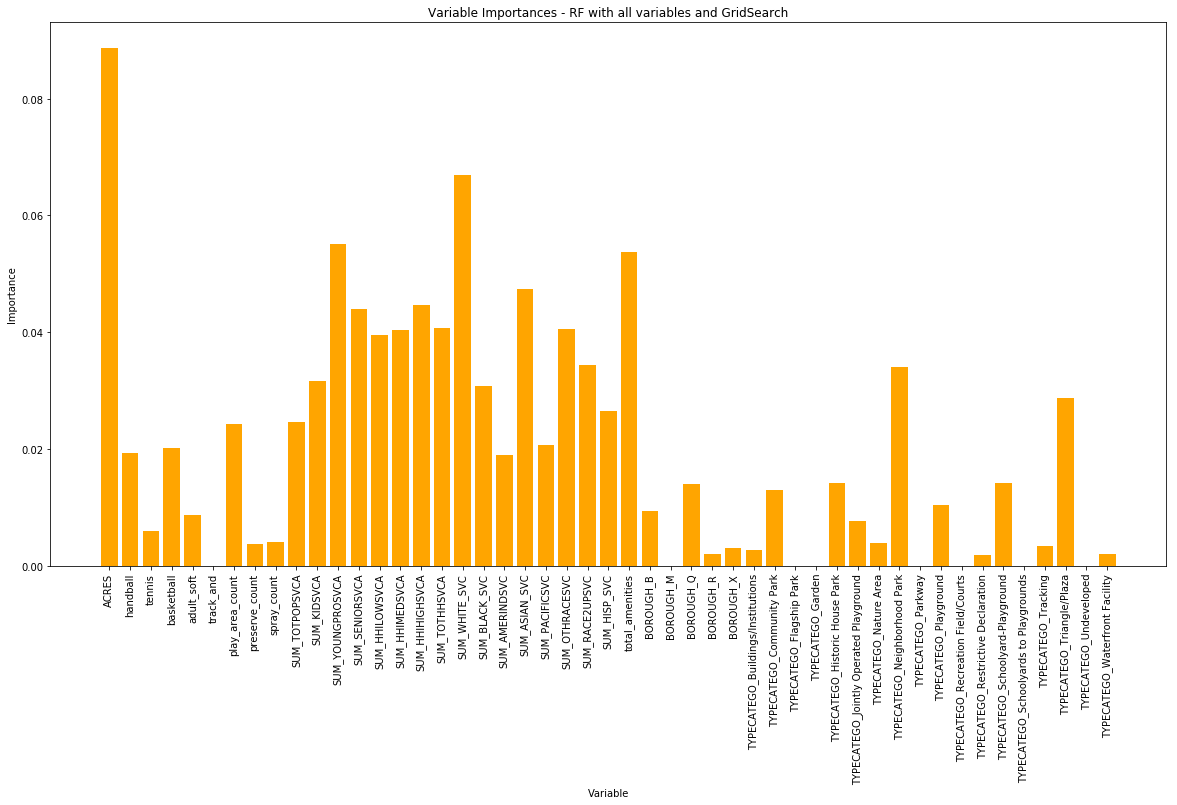

In [44]:
importances = list(rf.feature_importances_)

feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
print(sorted(feature_importances, key = lambda x: x[1], reverse=True))

plt.figure(figsize=(20,10))

x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'orange')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation=90)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - RF with all variables and GridSearch');

**Interestingly enough, this hyperparameterized-RF classification model resulted in a training accuracy of 99% and a test accuracy of 65%, which means the model is overfit, but performs a bit better on the test data than when using default parameters. Park size (acres) and white population living within a 10-minute walk of a park are the two most important features driving our model results, though neither of them are exceptionally great.**

Let's reduce the number of input variables...

In [52]:
# dropping all dummy varibles and total amenities (since it is a sum of all other amenities and thus, correlated)
parksInfo_noCate = parksInfo_dummied.iloc[:,:27].drop(['total_amenities'], axis=1)
parksInfo_noCate['tweet_class'] = parksInfo_noCate.apply(lambda row: label_tweets (row),axis=1)
parksInfo_noCate.head()

,ACRES,handball,tennis,basketball,adult_soft,track_and,play_area_count,preserve_count,spray_count,SUM_TOTPOPSVCA,...,SUM_WHITE_SVC,SUM_BLACK_SVC,SUM_AMERINDSVC,SUM_ASIAN_SVC,SUM_PACIFICSVC,SUM_OTHRACESVC,SUM_RACE2UPSVC,SUM_HISP_SVC,tweet_count,tweet_class
index,,,,,,,,,,,,,,,,,,,,,
0,1.874,0,0,3,1,0,4,0,1,26177,...,21238,1136,51,1769,10,865,1104,3279,872,2
1,6.379,4,0,1,0,0,5,0,1,29767,...,23922,174,27,4523,11,758,349,1652,59,1
2,35.713,12,8,4,4,0,7,0,2,42017,...,34676,564,112,3412,20,1926,1320,4974,7554,2
3,0.181,0,0,0,0,0,0,0,0,28730,...,19543,1013,170,2651,13,4040,1298,8766,81,1
4,0.293,0,0,0,0,0,1,0,1,32449,...,6323,22999,125,548,10,1312,1130,3770,23,0


In [46]:
y = np.array(parksInfo_noCate.tweet_class)
X = parksInfo_noCate.drop(['tweet_class','tweet_count'], axis=1)
#X_norm = normalize(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create the parameter grid based on the results of range
param_grid = {'n_estimators': range(1,50)}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(train_X, train_y)
grid_search.best_params_

{'n_estimators': 27}

In [47]:
rf = RandomForestClassifier(n_estimators=27)
# Train the model on training data
rf.fit(train_X, train_y)

predict_test = rf.predict(test_X)

print "Train Accuracy :: ", accuracy_score(train_y, rf.predict(train_X))
print "Test Accuracy  :: ", accuracy_score(test_y, predict_test)

Train Accuracy ::  1.0
Test Accuracy  ::  0.65


In [48]:
importances = list(rf.feature_importances_)

feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
print(sorted(feature_importances, key = lambda x: x[1], reverse=True))

[(u'ACRES', 0.12), (u'SUM_WHITE_SVC', 0.08), (u'SUM_HHIHIGHSVCA', 0.07), (u'SUM_ASIAN_SVC', 0.07), (u'SUM_SENIORSVCA', 0.05), (u'SUM_HHIMEDSVCA', 0.05), (u'SUM_AMERINDSVC', 0.05), (u'SUM_PACIFICSVC', 0.05), (u'SUM_OTHRACESVC', 0.05), (u'SUM_HISP_SVC', 0.05), (u'SUM_KIDSVCA', 0.04), (u'SUM_YOUNGPROSVCA', 0.04), (u'SUM_HHILOWSVCA', 0.04), (u'SUM_RACE2UPSVC', 0.04), (u'handball', 0.03), (u'basketball', 0.03), (u'play_area_count', 0.03), (u'SUM_TOTPOPSVCA', 0.03), (u'SUM_BLACK_SVC', 0.03), (u'SUM_TOTHHSVCA', 0.02), (u'tennis', 0.01), (u'spray_count', 0.01), (u'adult_soft', 0.0), (u'track_and', 0.0), (u'preserve_count', 0.0)]


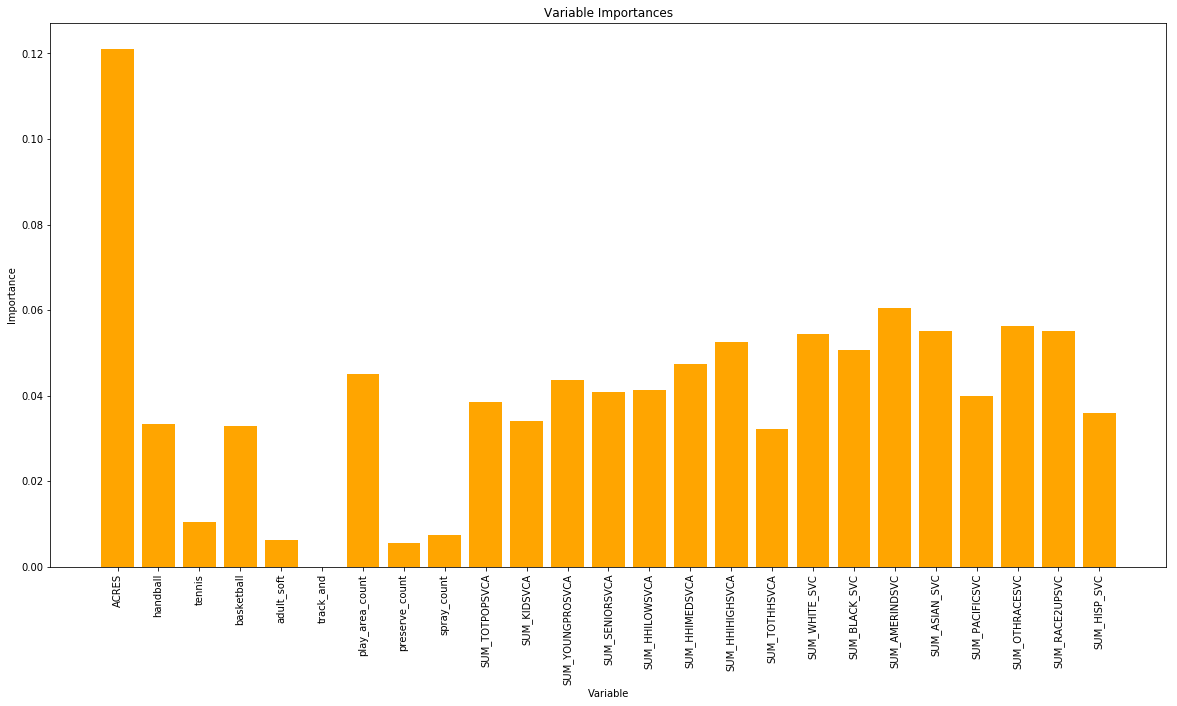

In [23]:
plt.figure(figsize=(20,10))
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'orange')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation=90)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**This hyperparameterized-RF classification model with a reduced # of input variables resulted in a training accuracy of 100% and a test accuracy of 65%, which means the model is overfit, very similarly to the previous run. Park size (acres) is once again the most important feature in the model, and the white population within a 10-minute walk of the park and the # of high income households living within a 10-minute walk of the park is back are #2 and #3.**

Let's look at the accuracy with the 3 initial variables of interest...


In [49]:
parksInfo_sub = parksInfo_dummied[['ACRES','SUM_TOTPOPSVCA','total_amenities',]]

y = np.array(parksInfo_dummied.tweet_class)
X = parksInfo_sub

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create the parameter grid based on the results of range
param_grid = {'n_estimators': range(1,50)}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(train_X, train_y)
grid_search.best_params_


{'n_estimators': 43}

In [50]:
rf = RandomForestClassifier(n_estimators=43)
rf.fit(train_X, train_y)

predict_test = rf.predict(test_X)


print "Train Accuracy :: ", accuracy_score(train_y, rf.predict(train_X))
print "Test Accuracy  :: ", accuracy_score(test_y, predict_test)

Train Accuracy ::  0.9871794871794872
Test Accuracy  ::  0.45


[(u'ACRES', 0.43), (u'SUM_TOTPOPSVCA', 0.32), (u'total_amenities', 0.25)]


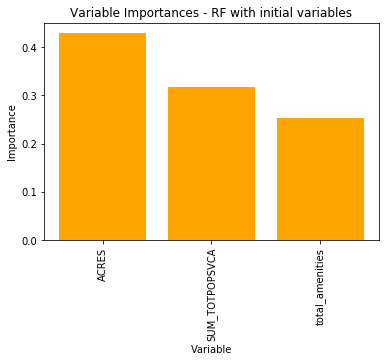

In [51]:
importances = list(rf.feature_importances_)

feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
print(sorted(feature_importances, key = lambda x: x[1], reverse=True))

x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'orange')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation=90)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - RF with initial variables');

**This resulted in the worst accuracy yet. Doesn't look like 3 variables do a good job predicting the number of tweets within a park!**